<a href="https://colab.research.google.com/github/msonah/msonah/blob/master/LGT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install orbit-ml


     |████████████████████████████████| 466 kB 4.4 MB/s 
     |████████████████████████████████| 718 kB 53.0 MB/s 
     |████████████████████████████████| 11.2 MB 49.7 MB/s 
     |████████████████████████████████| 9.8 MB 44.0 MB/s 
     |████████████████████████████████| 899 kB 57.6 MB/s 
     |████████████████████████████████| 750.6 MB 11 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

1.1.1


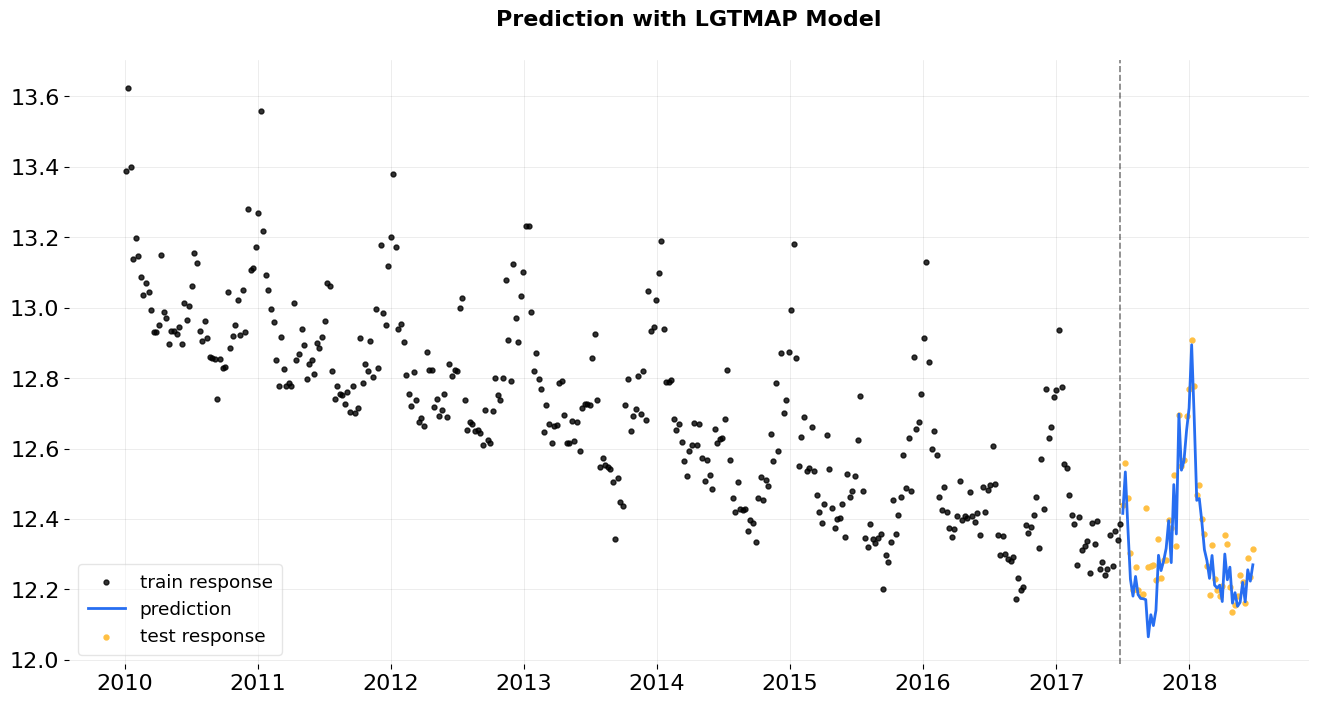

In [2]:
# source：https://orbit-ml.readthedocs.io/en/latest/tutorials/lgt.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import orbit
from orbit.models import LGT
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.plot import plot_predicted_components
from orbit.utils.dataset import load_iclaims

print(orbit.__version__)

# load data
df = load_iclaims()
# define date and response column
date_col = 'week'
response_col = 'claims'
df.dtypes
test_size = 52
train_df = df[:-test_size]
test_df = df[-test_size:]

lgt = LGT(
    response_col=response_col,
    date_col=date_col,
    estimator='stan-map',
    seasonality=52,
    seed=8888,
)

lgt.fit(df=train_df)

predicted_df = lgt.predict(df=test_df)
_ = plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df,
                        date_col=date_col, actual_col=response_col,
                        test_actual_df=test_df, title='Prediction with LGTMAP Model')